In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv("D:\\datamining\\bank\\bank1.csv", encoding = 'utf-8')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
y_mapping={'no':0,'yes':1}
job_mapping={ 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,
             'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11}
marital_mapping={'divorced':0,'married':1,'single':2,'unknown':3}
education_mapping={'primary':0,'secondary':1,'tertiary':2,'unknown':3}
default_mapping={'no':0,'yes':1,"unknown":2}
housing_mapping={'no':0,'yes':1,"unknown":2}
loan_mapping={'no':0,'yes':1,"unknown":2}
contact_mapping={'cellular':0,'telephone':1,"unknown":2}
month_mapping={'jan':0,'feb':1,'mar':2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
poutcome_mapping={ 'failure':0,'other':1,'success':2,"unknown":3}




df['y']=df['y'].map(y_mapping)
df['job']=df['job'].map(job_mapping)
df['marital']=df['marital'].map(marital_mapping)
df['education']=df['education'].map(education_mapping)
df['default']=df['default'].map(default_mapping)
df['housing']=df['housing'].map(housing_mapping)
df['loan']=df['loan'].map(loan_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['month']=df['month'].map(month_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,198,1,-1,0,3,0


In [20]:
print(df['y'].unique())
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())

[0 1]
[ 4  9  2  1 11  5  0  7  6 10  3  8]
[1 2 0]
[2 1 3 0]
[0 1]
[1 0]
[0 1]
[2]
[4]
[3]


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.898213,0.076346,-0.240910,1.179681,-0.143556,0.466247,0.338297,-0.391144,0.0,-1.486024,0.0,-0.041010,-0.497658,0.0,0.0,0.0
1,0.404914,1.590448,1.413954,-0.127166,-0.143556,-0.382204,0.338297,-0.391144,0.0,-1.486024,0.0,-0.466889,-0.497658,0.0,0.0,0.0
2,-0.768393,-0.529295,-0.240910,-0.127166,-0.143556,-0.393041,0.338297,2.556606,0.0,-1.486024,0.0,-0.757261,-0.497658,0.0,0.0,0.0
3,0.724907,-0.832116,-0.240910,2.486529,-0.143556,0.210588,0.338297,-0.391144,0.0,-1.486024,0.0,-0.695315,-0.497658,0.0,0.0,0.0
4,-0.768393,2.196090,1.413954,2.486529,-0.143556,-0.393442,-2.955982,-0.391144,0.0,-1.486024,0.0,-0.284923,-0.497658,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(labels=['y'],axis=1).values # 移除Species並取得剩下欄位資料
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (4160, 16)
test shape: (1040, 16)


In [ ]:
from sklearn import svm

# 建立SVR模型
linearModel=svm.SVR(C=1, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X_train, y_train)
# 使用訓練資料預測
predicted=linearModel.predict(X_test)

print('訓練集: ',linearModel.score(X_train,y_train))
print('測試集: ',linearModel.score(X_test,y_test))

In [8]:
X_test = df.iloc[:, :1].values
y_test = df.iloc[:, :1].values

Text(0, 0.5, 'Predicted')

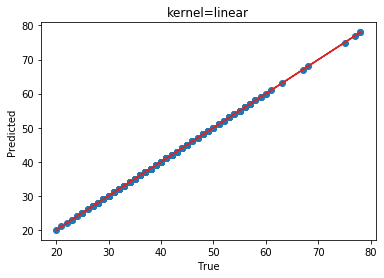

In [9]:
#linear plot
plt.scatter(X_test,y_test)
plt.plot(X_test.ravel(),y_test, color="#d62728")
plt.title('kernel=linear')
plt.xlabel('True')
plt.ylabel('Predicted')

In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted)
print("MAE: ",mae)

import math
MSE = np.square(np.subtract(y_test,predicted)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

mape = mean_absolute_error(y_test,predicted)*100
print("MAPE: ",mape)

MAE:  0.2299162725437682
RMSE:  0.3635196592037617
MAPE:  22.99162725437682


In [13]:
from sklearn import svm

# 建立SVR模型
polyModel=svm.SVR(C=1, kernel='poly', degree=3, gamma='scale')
# 使用訓練資料訓練模型
polyModel.fit(X_train, y_train)
# 使用訓練資料預測
predicted=polyModel.predict(X_test)

print('訓練集: ',polyModel.score(X_train,y_train))
print('測試集: ',polyModel.score(X_test,y_test))

訓練集:  0.01096395770236158
測試集:  0.014294332722819991


In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted)
print("MAE: ",mae)

import math
MSE = np.square(np.subtract(y_test,predicted)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

mape = mean_absolute_error(y_test,predicted)*100
print("MAPE: ",mape)

MAE:  0.17711303286732585
RMSE:  0.2978481325356031
MAPE:  17.711303286732587


In [15]:
from sklearn import svm

# 建立SVR模型
rbfModel=svm.SVR(C=1, kernel='rbf', gamma='auto')
# 使用訓練資料訓練模型
rbfModel.fit(X_train, y_train)
# 使用訓練資料預測
predicted=rbfModel.predict(X_test)

print('訓練集: ',rbfModel.score(X_train,y_train))
print('測試集: ',rbfModel.score(X_test,y_test))

訓練集:  0.9113701463376522
測試集:  -0.11963674157568473


In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted)
print("MAE: ",mae)

import math
MSE = np.square(np.subtract(y_test,predicted)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

mape = mean_absolute_error(y_test,predicted)*100
print("MAPE: ",mape)

MAE:  0.2630130213384512
RMSE:  0.317438666110182
MAPE:  26.301302133845123
